In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
df = pd.read_csv("data/Most-Recent-Cohorts-Institution.csv", low_memory=False)
df.replace("PrivacySuppressed", np.nan, inplace=True) # privacysuppressed
# # Plot the histogram of missing data for each variable
# missing = df.isna().sum(axis=0) / len(df) * 100
# plt.hist(missing, bins=20, color='skyblue', edgecolor='black')
# plt.title("Distribution of Missing Values per Variable")
# plt.xlabel("Percentage of Missing Values(%)")
# plt.ylabel("Number of Variables")
# plt.xticks(np.linspace(0,100,21))
# plt.grid()
# plt.tight_layout()
# plt.show()

# # Calculate the percentage of missing data in each column
# missing_percentage = df.isnull().mean() * 100

# # Select columns where missing data is less than 5%
# selected_columns = missing_percentage[missing_percentage < 20].index.tolist()
# dictionary = pd.read_excel('data/CollegeScorecardDataDictionary.xlsx',sheet_name='Institution_Data_Dictionary')
# dictionary = dictionary[dictionary['VARIABLE NAME'].isin(selected_columns)]
# dictionary.to_csv('data/lessthan20.csv', index=False)

In [74]:
# selected_institution_data = df[["INSTNM", "INEXPFTE", "ADM_RATE_ALL", "MD_EARN_WNE_4YR", "MEDIAN_HH_INC", "FAMINC", "MD_FAMINC", "STUFACR", "UGDS_MEN", "UGDS_WOMEN"]]
selected_institution_data = pd.read_csv('data/selected_institution.csv')
selected_institution_data.head()

,INSTNM,INEXPFTE,ADM_RATE_ALL,MD_EARN_WNE_4YR,MEDIAN_HH_INC,FAMINC,MD_FAMINC,STUFACR,UGDS_MEN,UGDS_WOMEN
0,Alabama A & M University,7699.0,0.716006,46562.0,49720.22,32362.826114,23553.0,18.0,0.4060,0.5940
1,University of Alabama at Birmingham,14264.0,0.885352,52404.0,55735.22,51306.674306,34489.0,19.0,0.3790,0.6210
2,Amridge University,4381.0,NaN,45765.0,53683.70,21079.472973,15033.5,13.0,0.3147,0.6853
3,University of Alabama in Huntsville,8156.0,0.736724,67695.0,58688.62,61096.588949,44787.0,19.0,0.5953,0.4047
4,Alabama State University,9459.0,0.979913,37551.0,46065.20,31684.382188,22080.5,13.0,0.3505,0.6495


In [75]:
selected_institution_data.describe()

,INEXPFTE,ADM_RATE_ALL,MD_EARN_WNE_4YR,MEDIAN_HH_INC,FAMINC,MD_FAMINC,STUFACR,UGDS_MEN,UGDS_WOMEN
count,6024.000000,2224.000000,5637.000000,5145.000000,5911.000000,5911.000000,5758.000000,5769.000000,5769.000000
mean,8759.862716,0.728743,40373.035835,58177.592089,40125.036241,29465.280156,14.967871,0.349934,0.647640
std,13306.209710,0.226722,16731.101079,12827.502697,23777.164631,19886.012235,6.998611,0.246280,0.247743
min,0.000000,0.000000,8915.000000,15790.530000,321.385321,0.000000,1.000000,0.000000,0.000000
25%,3854.500000,0.612580,27864.000000,50299.150000,23560.779029,16869.000000,10.000000,0.134700,0.530800
50%,6377.500000,0.780102,39282.000000,57880.380000,33136.902181,23028.000000,14.000000,0.361100,0.638000
75%,9894.500000,0.900904,49321.000000,66472.610000,50432.813711,35952.000000,18.000000,0.467500,0.863000
max,598759.000000,1.000000,139418.000000,100870.750000,174263.250000,179864.000000,112.000000,1.000000,1.000000


### Summary of data

Upon preliminary analysis, we found that there is a notable challenge concerning missing values in the dataset (see the figure below):
+ A minority of the variables (~5%) exhibit negligible levels of missing data, almost reaching zero percent.
+ Conversely, a substantial portion of the variables show more than 50% missing data.
To manage this during the feature selection phase, we plan to choose a cutoff point for missing data at 5%. This criterion is selected because it strikes a balance between maintaining high-quality data imputation and limiting the predictor set to a manageable number (around 35 variables). This strategy is anticipated to support both the performance and the interpretability of our resulting model.


Text(0, 0.5, 'Frequency')

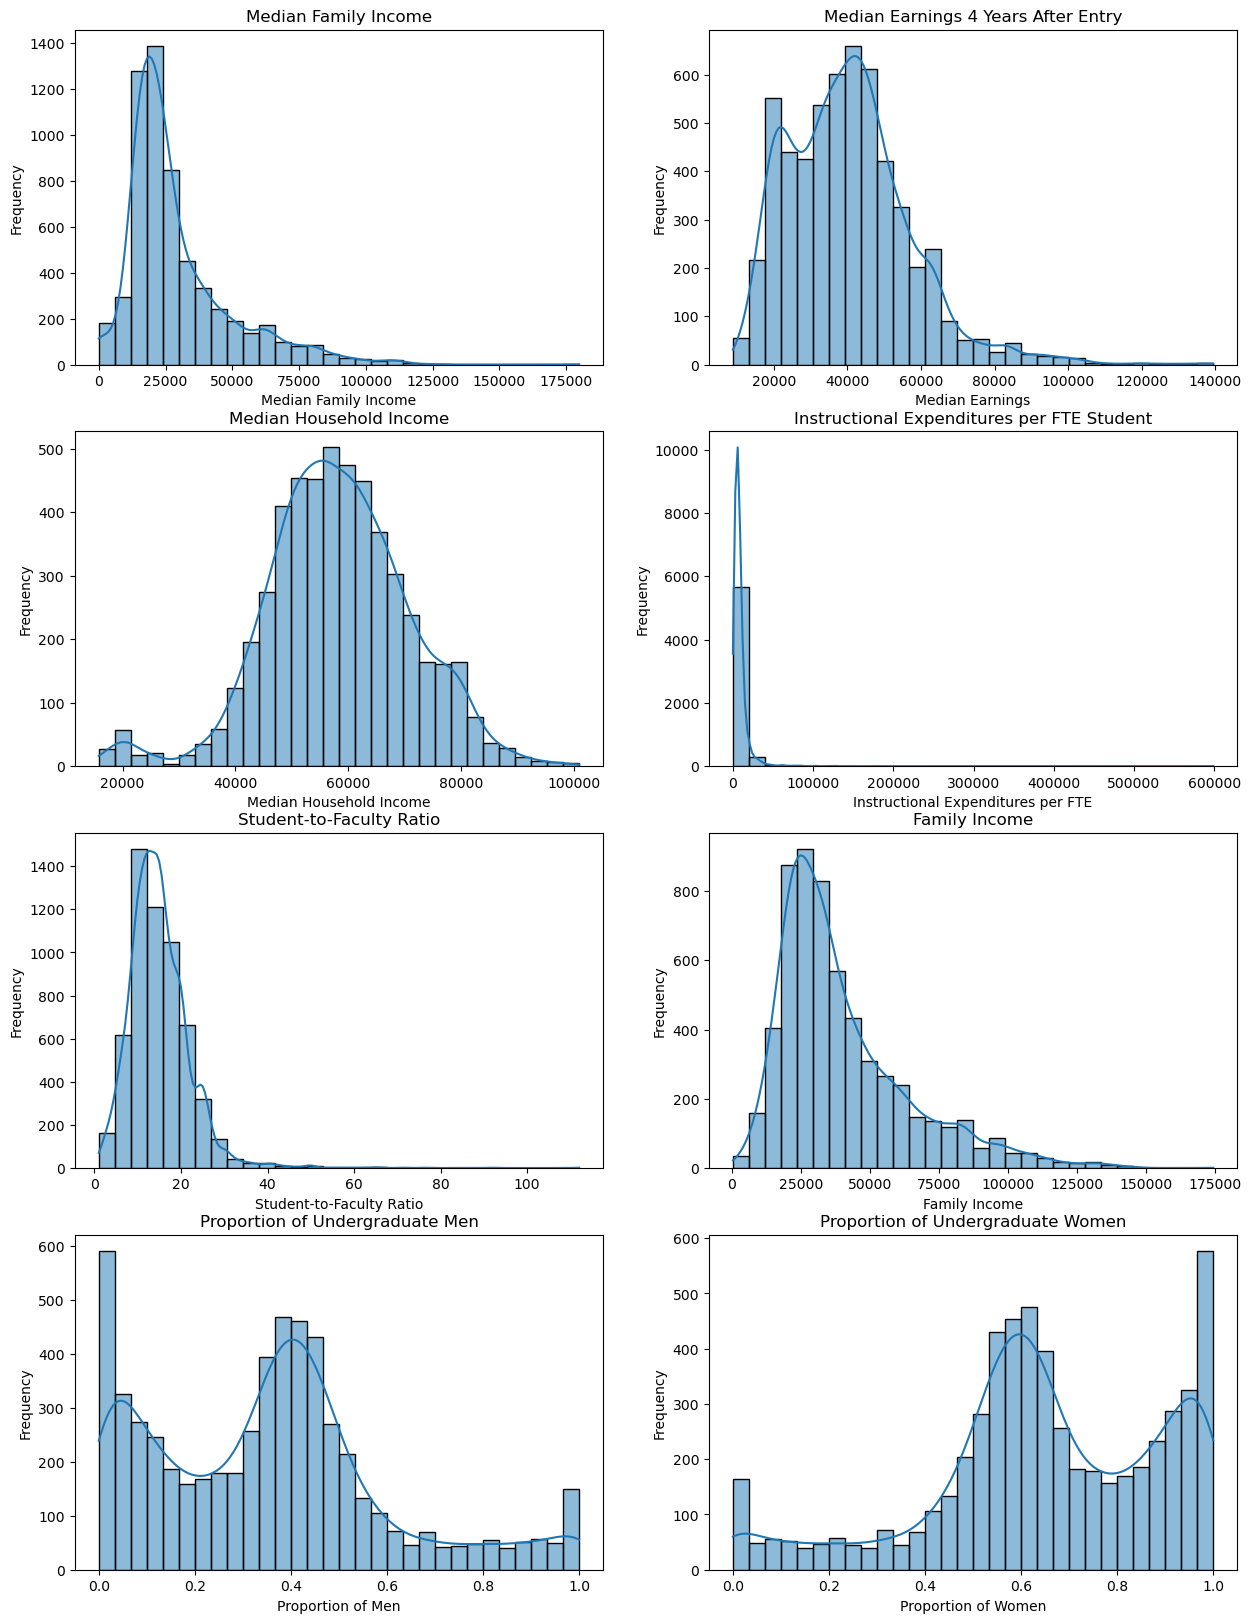

In [94]:
import seaborn as sns

# Checking for missing values and data types in the new dataset
missing_values_new = selected_institution_data.isnull().sum()
data_types_new = selected_institution_data.dtypes

# Create a DataFrame to display missing values and data types
missing_values_and_types_new = pd.DataFrame({'Missing Values': missing_values_new, 'Data Type': data_types_new})
missing_values_and_types_new.sort_values(by="Missing Values", ascending=False)


# Setting up the plot area
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Distribution of Median Family Income
sns.histplot(selected_institution_data['MD_FAMINC'], ax=axes[0, 0], kde=True, bins=30)
axes[0, 0].set_title('Median Family Income')
axes[0, 0].set_xlabel('Median Family Income')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Median Earnings 4 Years After Entry
sns.histplot(selected_institution_data['MD_EARN_WNE_4YR'], ax=axes[0, 1], kde=True, bins=30)
axes[0, 1].set_title('Median Earnings 4 Years After Entry')
axes[0, 1].set_xlabel('Median Earnings')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Median Household Income
sns.histplot(selected_institution_data['MEDIAN_HH_INC'], ax=axes[1, 0], kde=True, bins=30)
axes[1, 0].set_title('Median Household Income')
axes[1, 0].set_xlabel('Median Household Income')
axes[1, 0].set_ylabel('Frequency')

# Distribution of Instructional Expenditures per FTE Student
sns.histplot(selected_institution_data['INEXPFTE'], ax=axes[1, 1], kde=True, bins=30)
axes[1, 1].set_title('Instructional Expenditures per FTE Student')
axes[1, 1].set_xlabel('Instructional Expenditures per FTE')
axes[1, 1].set_ylabel('Frequency')

# Distribution of Student-to-Faculty Ratio
sns.histplot(selected_institution_data['STUFACR'], ax=axes[2, 0], kde=True, bins=30)
axes[2, 0].set_title('Student-to-Faculty Ratio')
axes[2, 0].set_xlabel('Student-to-Faculty Ratio')
axes[2, 0].set_ylabel('Frequency')

# Distribution of Family Income
sns.histplot(selected_institution_data['FAMINC'], ax=axes[2, 1], kde=True, bins=30)
axes[2, 1].set_title('Family Income')
axes[2, 1].set_xlabel('Family Income')
axes[2, 1].set_ylabel('Frequency')

# Distribution of Proportion of Undergraduate Men
sns.histplot(selected_institution_data['UGDS_MEN'], ax=axes[3, 0], kde=True, bins=30)
axes[3, 0].set_title('Proportion of Undergraduate Men')
axes[3, 0].set_xlabel('Proportion of Men')
axes[3, 0].set_ylabel('Frequency')

# Distribution of Proportion of Undergraduate Women
sns.histplot(selected_institution_data['UGDS_WOMEN'], ax=axes[3, 1], kde=True, bins=30)
axes[3, 1].set_title('Proportion of Undergraduate Women')
axes[3, 1].set_xlabel('Proportion of Women')
axes[3, 1].set_ylabel('Frequency')


<!-- The histograms provide a visual representation of the distribution of various key metrics in the dataset:

Admission Rates (`ADM_RATE_ALL`): This distribution shows a range of admission rates. Some institutions have very high admission rates (close to 1), while others are more selective.

Median Earnings 4 Years After Entry (`MD_EARN_WNE_4YR`): The earnings distribution is skewed, with most institutions having median earnings in the lower to middle range, and fewer institutions with very high median earnings.

Median Household Income (`MEDIAN_HH_INC`): This distribution is also skewed, indicating variability in the median household incomes associated with the students attending these institutions.

Instructional Expenditures per FTE Student (`INEXPFTE`): The expenditures per full-time equivalent student vary significantly among institutions, with a skew towards lower expenditures in most institutions.

Student-to-Faculty Ratio (`STUFACR`): Most institutions have a moderate student-to-faculty ratio, with few institutions having extremely high or low ratios.

Proportion of Undergraduate Men (`UGDS_MEN`): This shows a fairly even distribution across institutions, with a slight skew towards a higher proportion of men.

Admission Rates:
Unimodal distribution with a peak around 0.6-0.7.
Slight left-skew, indicating a few institutions with very low admission rates.

Median Earnings 4 Years After Entry:
Unimodal distribution with a peak around $30,000 to $40,000.
Right-skewed, indicating fewer instances of very high earnings.

Median Household Income:
Wide variation with some higher-end outliers.
Difficult to interpret due to frequency axis scale.

Instructional Expenditures per FTE Student:
Heavily right-skewed, most institutions have low expenditures.
A few institutions spend significantly more.

Student-to-Faculty Ratio:
Most institutions have a ratio of about 15 to 20.
Right-skewed, fewer institutions with very high ratios.

Proportion of Undergraduate Men:
Bimodal distribution with peaks near 0 (few or no men), 0.4-0.5, and a smaller peak around 0.6. -->

#### 2. Correlation Analysis

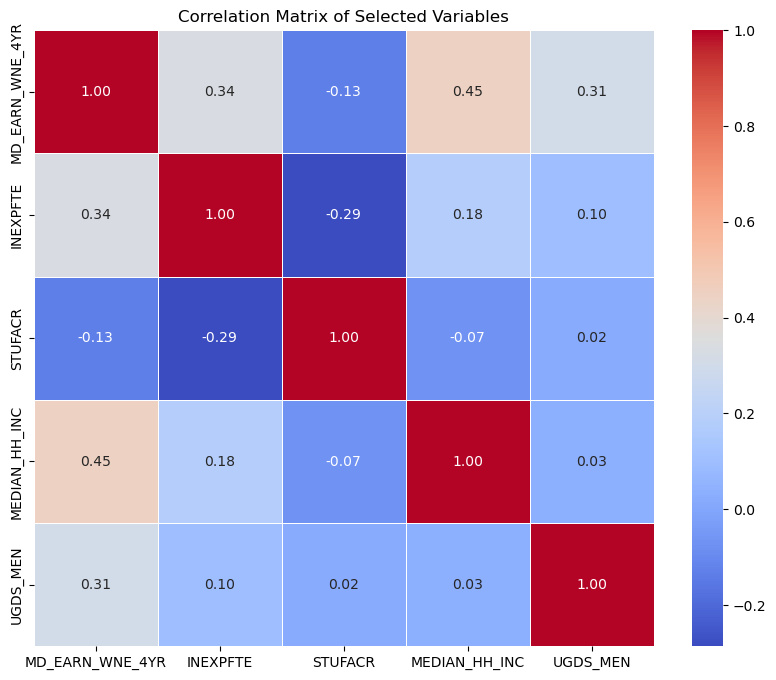

In [93]:
# Selecting relevant columns for correlation analysis
correlation_columns = ['MD_EARN_WNE_4YR', 'INEXPFTE', 'STUFACR', 'MEDIAN_HH_INC', 'UGDS_MEN']

# Compute the correlation matrix
correlation_matrix = selected_institution_data[correlation_columns].corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

<!-- The heatmap above visualizes the correlation matrix of selected variables. Here's a brief interpretation of key findings:
* Admission Rate (ADM_RATE_ALL) and Median Earnings 4 Years After Entry (MD_EARN_WNE_4YR): There's a mild negative correlation (-0.27), suggesting that institutions with lower admission rates (more selective) tend to have graduates with higher median earnings.
* Instructional Expenditures per FTE (INEXPFTE) and Student-to-Faculty Ratio (STUFACR): A slight negative correlation (-0.19) indicates that higher instructional expenditures per student might be associated with lower student-to-faculty ratios.
* Proportion of Undergraduate Men (UGDS_MEN) and Women (UGDS_WOMEN): As expected, a strong negative correlation (-1.00) is observed, reflecting the fact that these are complementary proportions (totaling 100%).
This correlation analysis provides insight into how different aspects of institutional characteristics are interrelated. For instance, it suggests that selectivity in admissions may be a factor in future earnings potential of graduates, and that institutions investing more in instruction per student tend to maintain lower student-to-faculty ratios. -->

<!-- ### Data Description
The College Scorecard dataset is a comprehensive collection of higher education institutions and field-of-study information intended to assist prospective students, families, and educational policymakers. It promotes transparency by highlighting college performance metrics and outcomes.

The preprocessing steps we took include:
* Missing Values: The dataset had missing values in several columns. Where applicable, these were kept intact to maintain the integrity of the dataset, as imputation might introduce bias.
* Selection of Variables: The analysis focused on key variables that could provide insights into the performance and characteristics of the institutions, such as ADM_RATE_ALL, MD_EARN_WNE_4YR, INEXPFTE, and student demographics.
* Exploration Methods:
Distribution Analysis: Histograms were used to explore the distribution of variables like admission rates, median earnings, and instructional expenditures.
Correlation Analysis: A correlation matrix was generated to understand the relationships between different variables.

### Noteworthy Findings
Admission Selectivity and Earnings: Institutions with lower admission rates tend to have graduates with higher median earnings.
Investment in Instruction and Faculty: Higher instructional expenditures per student are associated with lower student-to-faculty ratios.
Gender Distribution: The student body's gender distribution varies widely across institutions.

### Project Question
Based on the insights from the EDA, a guiding question for further analysis could be: "How do institutional characteristics like admission rates and instructional expenditures influence the earnings potential and academic environment (student-to-faculty ratio) of graduates?"

###  Baseline Model or Implementation Plan
Predictive Modeling Approach:
If the project involves predictive modeling, a baseline model can be developed to predict key outcomes like median earnings based on institutional characteristics. Potential models include linear regression for continuous outcomes or logistic regression for categorical outcomes (e.g., classifying institutions into different categories based on success metrics).

Data Utilization:
The model will utilize features such as admission rates, instructional expenditures, and student demographics. Feature engineering may be applied to create more informative variables.

Evaluation Metrics:
Performance can be evaluated using metrics like R-squared for regression models or accuracy and F1-score for classification models. -->